In [1]:
import numpy as np
from itertools import permutations
from scipy.stats import binom

# --- Strategy Definitions ---
# Returns [prob_check, prob_bet] for preflop actions
def player_a_strategy(card):
    if card == 0:   # J
        return [0.85, 0.15]  # Always check
    elif card == 1: # Q
        return [0.5, 0.5]  # Mix
    else:           # K
        return [0.1, 0.9]  # Always bet

def player_b_strategy(card):
    # Random strategy
    return [0.5, 0.5]  # Mix

# --- Expected Value Calculator ---
def calculate_ev(player1_strat, player2_strat):
    cards = [0, 1, 2]  # J, Q, K
    total_ev = 0
    n_combos = 0
    
    for p1_card, p2_card in permutations(cards, 2):
        prob_deal = 1 / 6  # 6 possible card matchups
        
        # Get strategies for this hand
        p1_act = player1_strat(p1_card)
        p2_act = player2_strat(p2_card)
        
        # --- Action Sequence 1: P1 checks -> P2 checks ---
        prob = p1_act[0] * p2_act[0]  # Both check
        if p1_card > p2_card:
            payoff = 1  # P1 wins ante
        else:
            payoff = -1
        total_ev += prob_deal * prob * payoff
        
        # --- Action Sequence 2: P1 checks -> P2 bets -> P1 calls ---
        prob = p1_act[0] * p2_act[1] * 1.0
        if p1_card > p2_card:
            payoff = 2  # Pot size 4, net +2
        else:
            payoff = -2
        total_ev += prob_deal * prob * payoff
        
        # --- Action Sequence 3: P1 bets -> P2 calls ---
        prob = p1_act[1] * 1.0
        if p1_card > p2_card:
            payoff = 2
        else:
            payoff = -2
        total_ev += prob_deal * prob * payoff
        
    return (1 + total_ev / 2) / 2  # Convert EV to win probability

# --- Simulation ---
win_prob = calculate_ev(player_a_strategy, player_b_strategy)
# win_prob = (1 + ev_per_hand / 2) / 2  # Convert EV to win probability       

print(f"Player A's per-hand win probability: {win_prob:.3f}")

# --- Calculate Rounds Needed for Confidence ---
def rounds_needed(win_prob, target_confidence=0.99):
    n = 1
    while True:
        # Probability Player A wins >50% of rounds
        prob = 1 - binom.cdf(n//2+1, n, win_prob)
        if prob > target_confidence:
            return n
        n += 1

print(f"Rounds needed for 99% confidence: {rounds_needed(win_prob)}")

Player A's per-hand win probability: 0.531
Rounds needed for 99% confidence: 1447


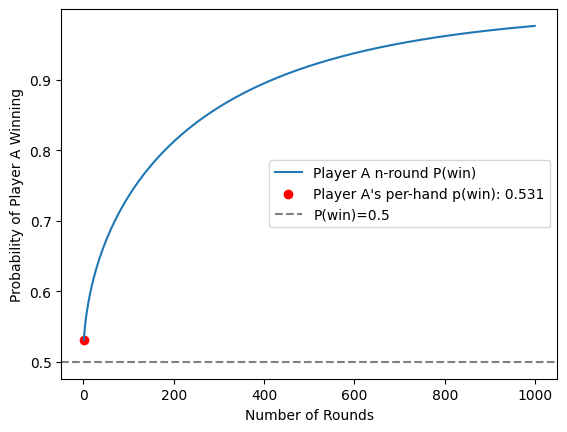

In [2]:
import matplotlib.pyplot as plt

# --- Plotting ---
n = np.arange(1, 1000, 2)

prob = 1 - binom.cdf(n//2, n, win_prob)

plt.figure()
plt.plot(n, prob, label="Player A n-round P(win)")
plt.scatter(1, win_prob, color='red', label=f"Player A's per-hand p(win): {np.round(win_prob, 3)}")
# plt.scatter(193, 0.99, color='green', label="n=193 => 99% Confidence")
plt.axhline(0.5, color='gray', linestyle='--', label="P(win)=0.5")
plt.xlabel("Number of Rounds")
plt.ylabel("Probability of Player A Winning")
plt.legend()
plt.savefig("poker-n-rounds.png", dpi=300)

In [3]:
rounds_needed(win_prob)

1447

In [4]:
 rounds_needed(win_prob)

1447

13727
3479
1567
893
579


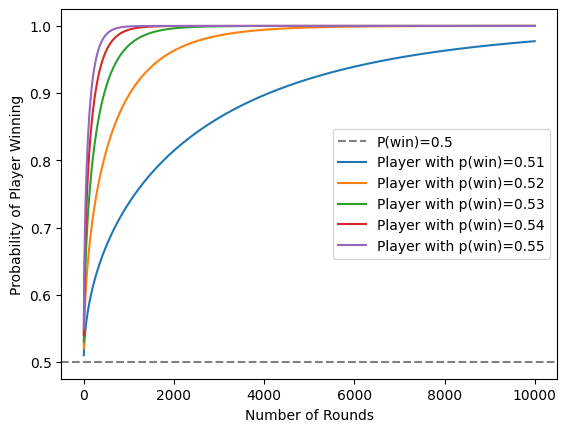

In [5]:
win_prob = 0.501
win_probs = [0.51, 0.52, 0.53, 0.54, 0.55]


plt.figure()

plt.axhline(0.5, color='gray', linestyle='--', label="P(win)=0.5")
for i, win_prob in enumerate(win_probs):
    # plt.subplot(1, 5, i+1)
    n_rounds = rounds_needed(win_prob)
    print(n_rounds)

    # --- Plotting ---
    n = np.arange(1, 10000, 2)

    prob = 1 - binom.cdf(n//2, n, win_prob)

    plt.plot(n, prob, label=f"Player with p(win)={win_prob}")
    plt.xlabel("Number of Rounds")
    plt.ylabel("Probability of Player Winning")
    plt.legend()
plt.savefig("poker-n-rounds.png", dpi=300)